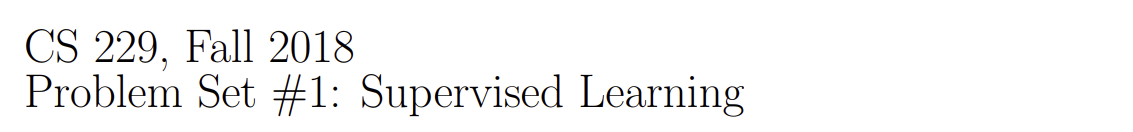

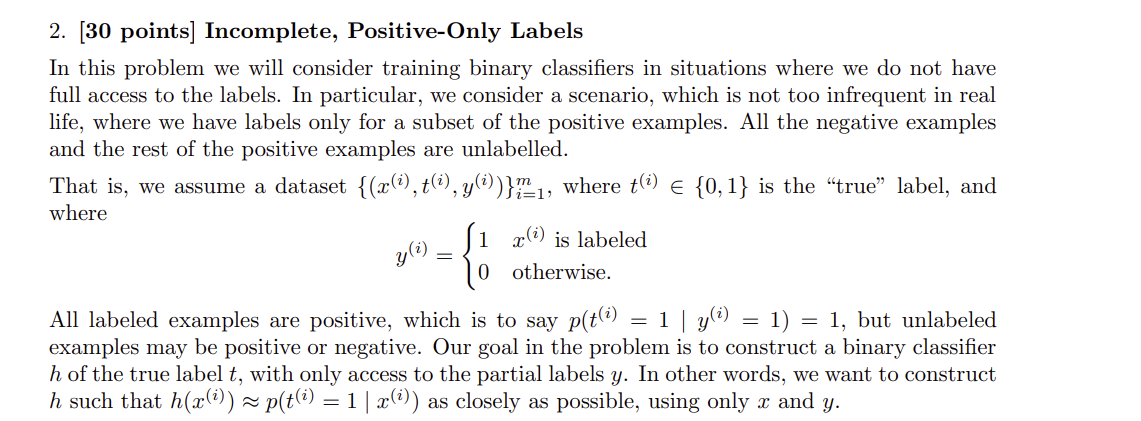

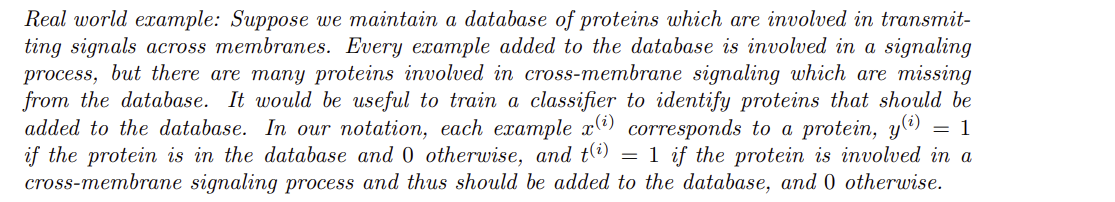

# **(a)**
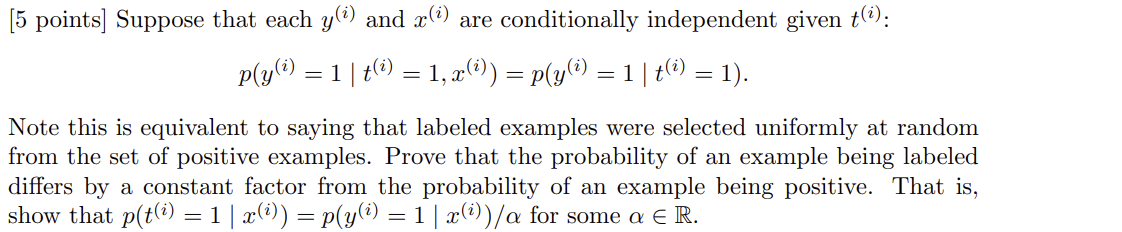

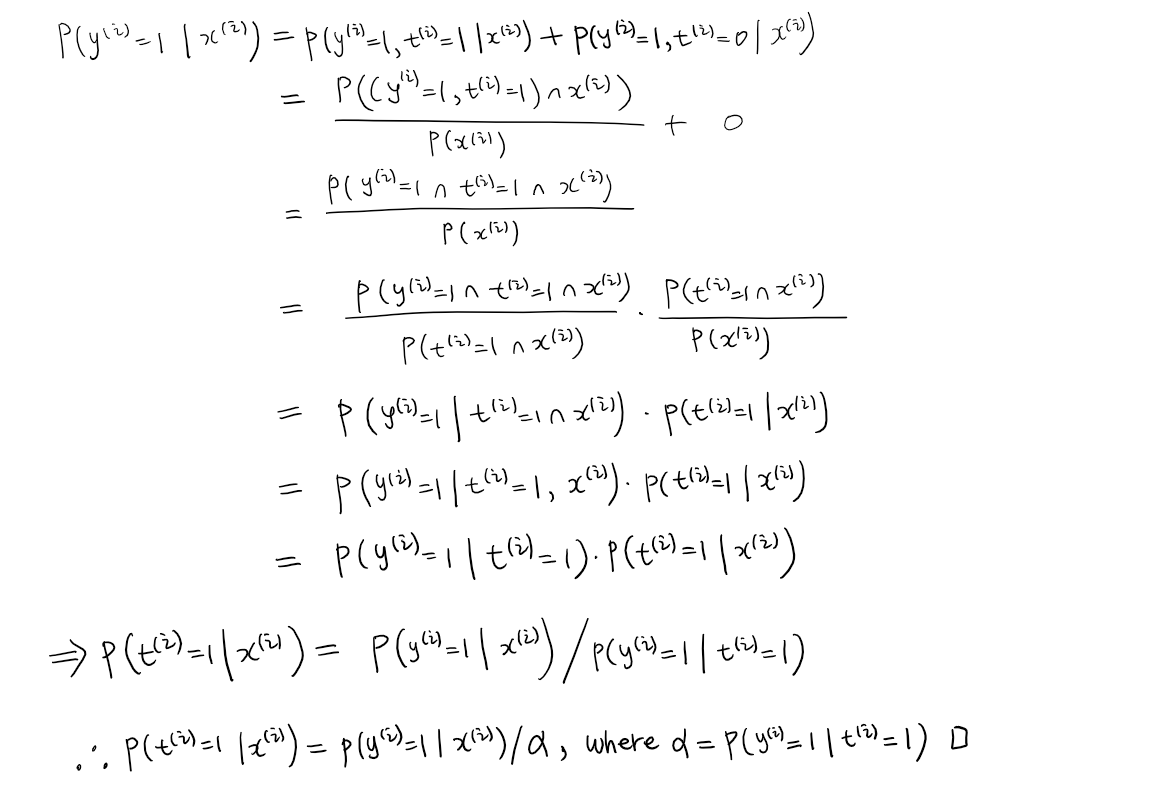

# **(b)**
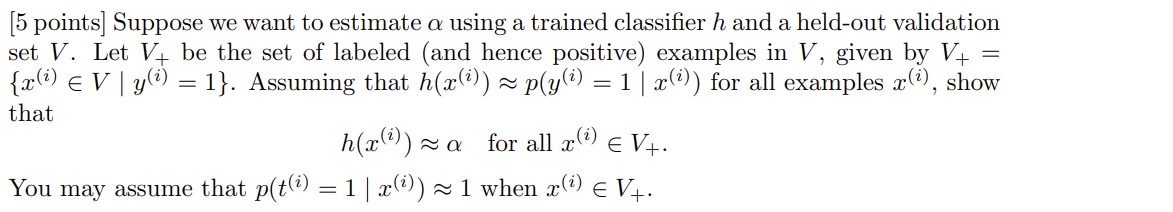

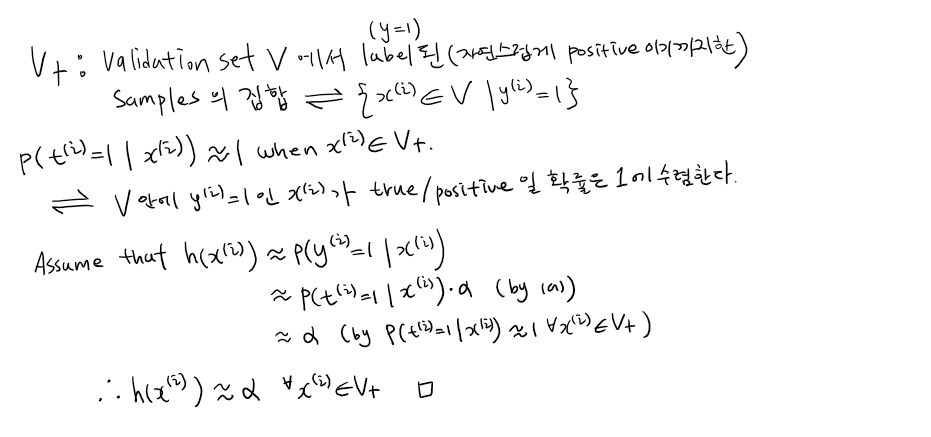

# **(c)**
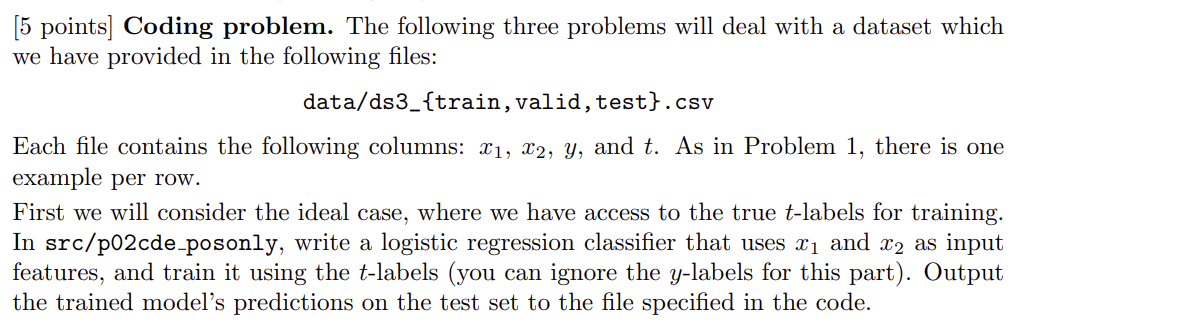

In [1]:
import numpy as np
import src.util as util

from src.linear_model import LinearModel

In [2]:
# Here we use the t-labels and ignore the y-labels, so label_col = 't' in a function of load_dataset
x_train, y_train = util.load_dataset('data/ds3_train.csv', label_col='t', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds3_valid.csv', label_col='t', add_intercept=True)
x_test, y_test = util.load_dataset('data/ds3_test.csv', label_col='t', add_intercept=True)

In [3]:
x_train.shape

(1250, 3)

In [4]:
class LogisticRegression(LinearModel):
    def fit(self, x, y):
        """
        Args:
            x: Training example inputs of shape (m, n)
            y: Training example labels of shape (m,)
        """
        
        m, n = x.shape
        if self.theta is None:
            self.theta = np.zeros((n,))
        g = lambda z: 1 / (1 + np.exp(-z))

        for _ in range(self.max_iter):
            h = g(x @ self.theta)
            gradient = 1/m * (x.T @ (h - y))
            hessian = 1/m * (x.T @ (np.expand_dims(h * (1-h), axis=-1) * x))
            new_theta = self.theta - (np.linalg.inv(hessian) @ gradient)
            if np.linalg.norm(new_theta - self.theta, 1) < self.eps:
                self.theta = new_theta
                break
            self.theta = new_theta
    
    def predict(self, x):
        """
        Args:
            x: Inputs of shape (m, n)
        """

        g = lambda z: 1 / (1 + np.exp(-z))

        return g(x @ self.theta)

In [5]:
lr = LogisticRegression()

In [6]:
lr.fit(x_train, y_train)

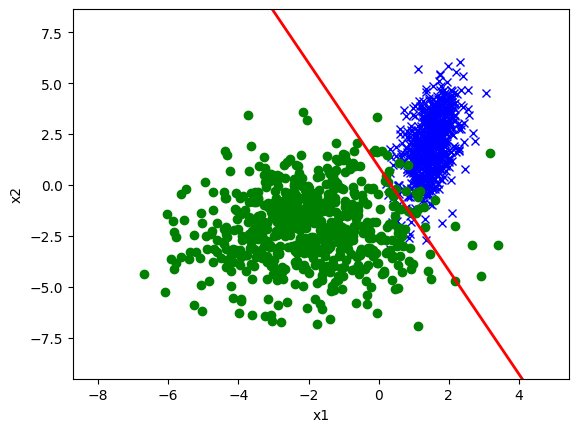

In [7]:
util.plot(x_train, y_train, theta=lr.theta)

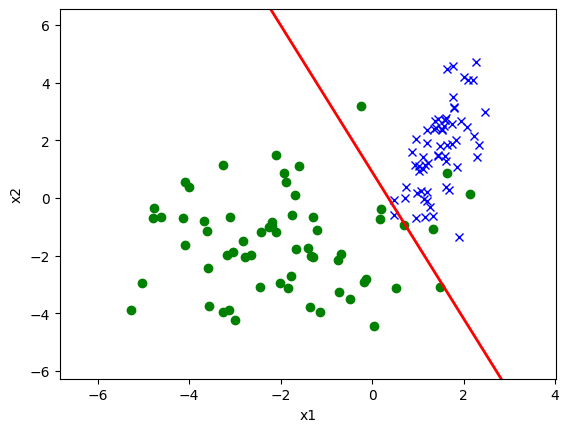

In [8]:
util.plot(x_valid, y_valid, theta=lr.theta)

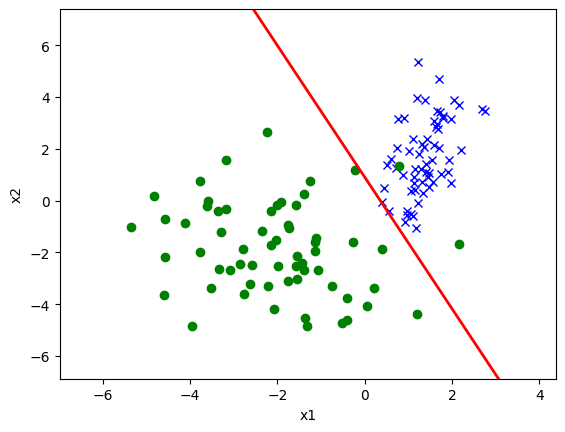

In [9]:
util.plot(x_test, y_test, theta=lr.theta)

In [10]:
print("최적의 Theta:", lr.theta)
print("학습 정확도:", np.mean(y_train == (lr.predict(x_train) >= 0.5)))
print("검증 정확도:", np.mean(y_valid == (lr.predict(x_valid) >= 0.5)))
print("테스트 정확도:", np.mean(y_test == (lr.predict(x_test) >= 0.5)))

최적의 Theta: [-0.9711418   2.73208784  1.07403478]
학습 정확도: 0.9632
검증 정확도: 0.9596774193548387
테스트 정확도: 0.9838709677419355


# **(d)**
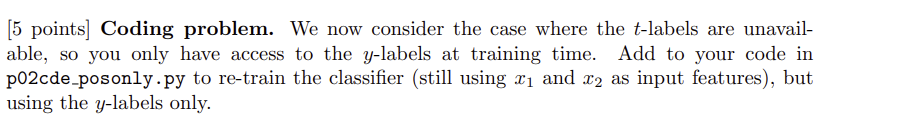

In [11]:
import numpy as np
import src.util as util

from src.linear_model import LinearModel

In [12]:
# We only have access to the y-labels at training time.
# y^(i) = 1 이면, 항상 t^(i) = 1 (= label 된 samples 는 항상 true/positive samples 임.)
x_train, y_train = util.load_dataset('data/ds3_train.csv', label_col='y', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds3_valid.csv', label_col='t', add_intercept=True)
x_test, y_test = util.load_dataset('data/ds3_test.csv', label_col='t', add_intercept=True)

In [13]:
x_train.shape

(1250, 3)

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(x_train, y_train)

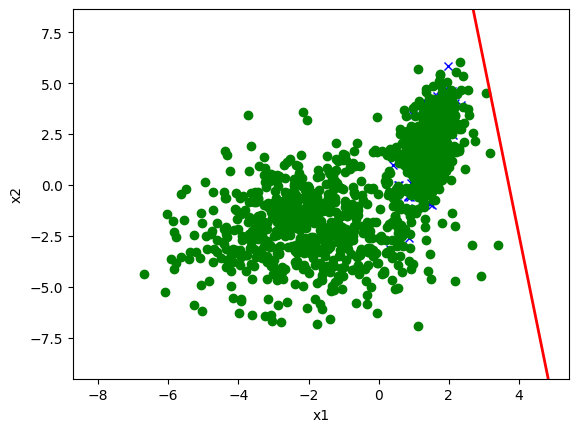

In [16]:
util.plot(x_train, y_train, theta=lr.theta)

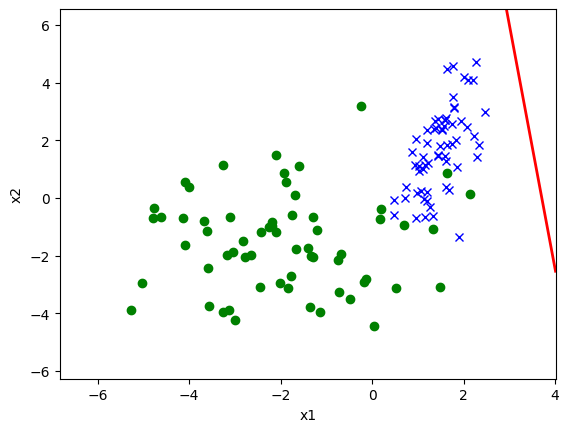

In [17]:
util.plot(x_valid, y_valid, theta=lr.theta)

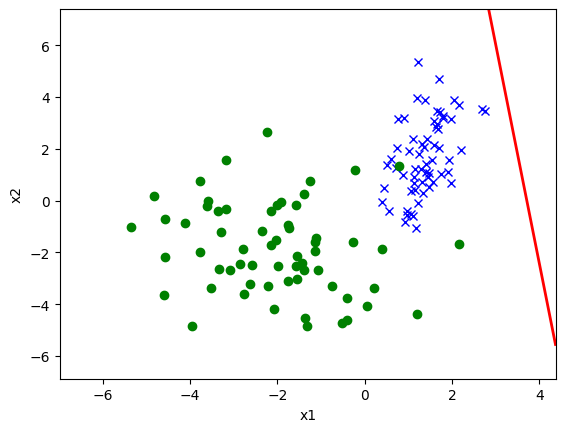

In [18]:
util.plot(x_test, y_test, theta=lr.theta)

In [19]:
print("최적의 Theta:", lr.theta)
print("학습 정확도:", np.mean(y_train == (lr.predict(x_train) >= 0.5)))
print("검증 정확도:", np.mean(y_valid == (lr.predict(x_valid) >= 0.5)))
print("테스트 정확도:", np.mean(y_test == (lr.predict(x_test) >= 0.5)))

최적의 Theta: [-2.91607454  0.78596651  0.09282768]
학습 정확도: 0.9
검증 정확도: 0.5
테스트 정확도: 0.5


# **(e)**
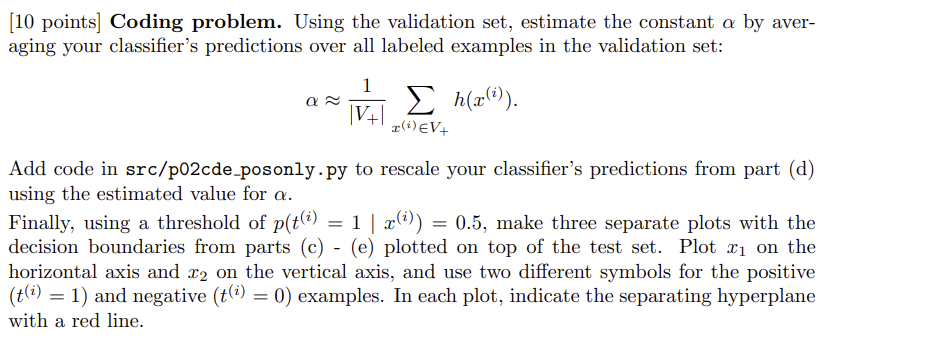

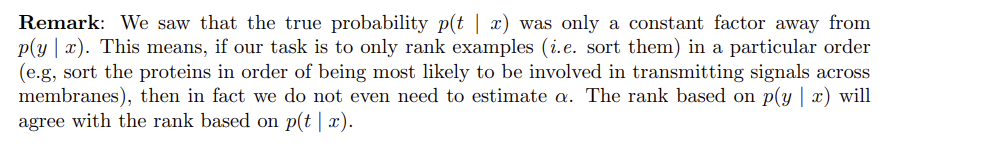

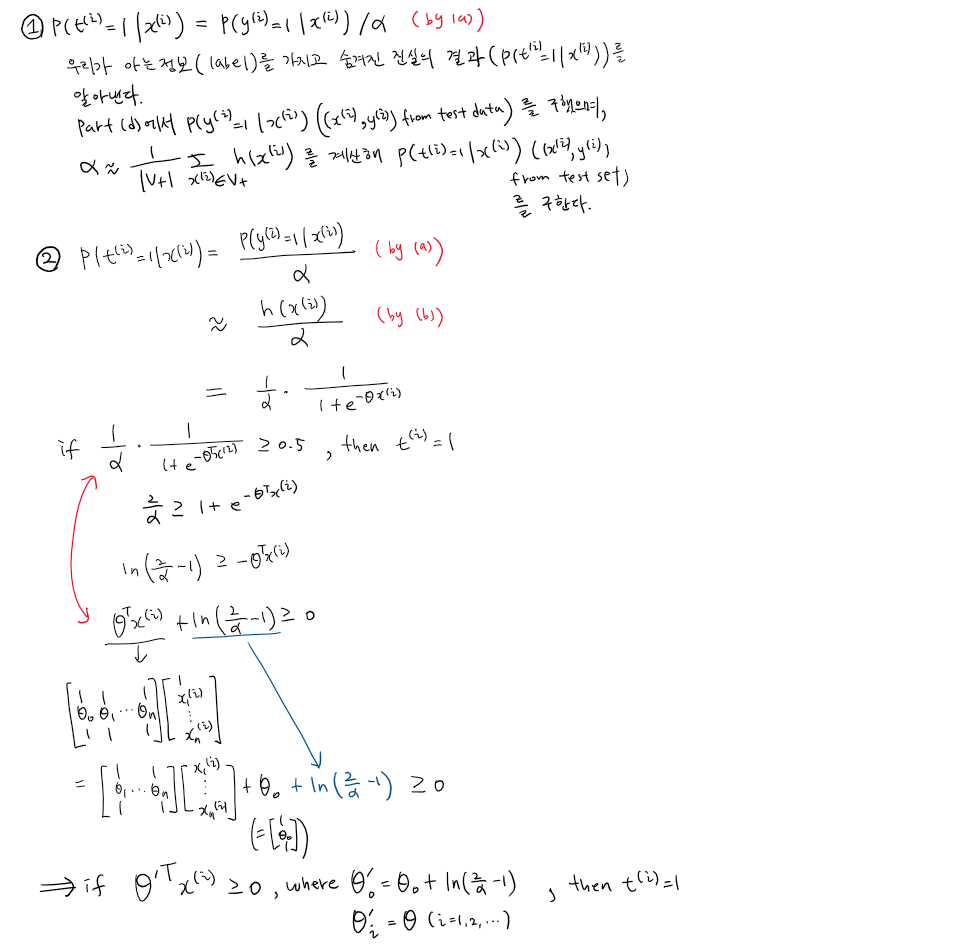

In [20]:
# 1
# Logistic regression model (lr) from part (d)
v_plus = x_valid[y_valid == 1]
alpha = np.mean(lr.predict(v_plus))
print("테스트 정확도:", np.mean(y_test == ((lr.predict(x_test) / alpha) >= 0.5)))

테스트 정확도: 0.9516129032258065


In [21]:
# 2
theta_new = lr.theta.copy()
theta_new[0] = theta_new[0] + np.log(2 / alpha - 1)
print("테스트 정확도:", np.mean(y_test == ((x_test @ theta_new) >= 0)))

테스트 정확도: 0.9516129032258065


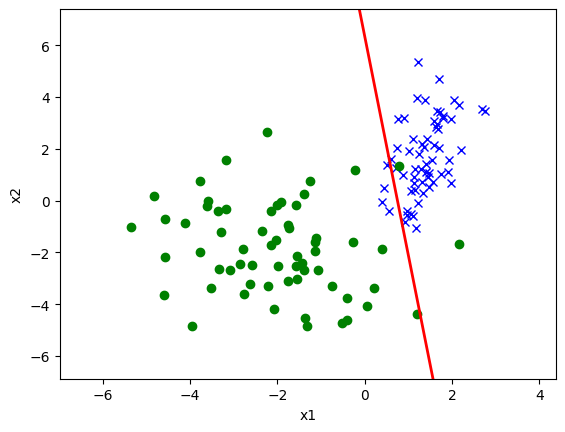

In [22]:
util.plot(x_test, y_test, theta=theta_new)